In [126]:
def sss():
    asf = glob.glob('/home/ubuntu/whale/data/*.jpg')
    with Pool(8) as p:
        list(p.map(make_anno, asf))

In [47]:
%matplotlib inline
import json
from IPython.display import Image, display
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
from multiprocessing import Pool
NORM_LABEL = ['尾部下沿中间点', '鲸鱼尾巴尖', '尾部入水中间点', '尾部下沿', '尾部侧沿（右侧）', '尾部入水线', '尾部侧沿（左侧）']

## BaseLine 

In [59]:
@showImage
def make_anno(data_path):
    # Generating corresponding path
    id_name = data_path.split('/')[-1][:-4]
    ann_path = f'/home/ubuntu/whale/annotation/20190103total/{id_name}.json'
    
    # Reading
    img = cv2.imread(data_path)[...,::-1]
    with open(ann_path, 'r', encoding='utf-8') as f:
        anno = json.load(f)
    # Generating points set
    six_group_points = [[] for _ in NORM_LABEL]
    for key, group in anno['annotation'][0].items():
        idx = NORM_LABEL.index(key)
        for item in group:
            six_group_points[idx].append(int(item['x']))
            six_group_points[idx].append(int(item['y']))
    # Generating heatmap sets
    heatmap = np.zeros([len(NORM_LABEL)]+list(img.shape[:2]), np.uint8)
    hhh = -1
    sigma = 2
    for point in six_group_points:
        hhh += 1
        if len(point) > 4:
            for i in range(0, len(point)-2, 2):
                heatmap[hhh] = cv2.line(heatmap[hhh], (point[i], point[i+1]), (point[i+2], point[i+3]),(1), 3)
        else:
            for i in range(0, len(point), 2):
                heatmap[hhh] = cv2.circle(heatmap[hhh], (point[i], point[i+1]), 3, 1, 3)
    # Generating Seg
    flat_points = []
    for point in six_group_points:
        flat_points.extend(point)
    seg_num = len(six_group_points[0]) + len(six_group_points[1]) + len(six_group_points[2])
    seg_heatmap = np.zeros(img.shape[:2])
    points_np = np.array(flat_points[seg_num:], dtype=np.int32).flatten().reshape(-1, 1, 2)
    cv2.fillPoly(seg_heatmap, [points_np], (1,), cv2.LINE_AA)
    
    # Saving this as npy
    save_heatmaps = np.array([img, seg_heatmap, heatmap])
    np.save(f'/home/ubuntu/whale/seg/{id_name}.npy', save_heatmaps)
    return img, seg_heatmap


## Decorator

In [58]:
def showImage(func):
    def wrapper(path):
        print(path.split('/')[-1][:-4], ' started!')
        img, seg = func(path)
        # 并排显示
        fig = plt.figure(figsize=(8, 16))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.subplot(1, 2, 2)
        plt.imshow(seg)
        plt.show()
        
    return wrapper

In [62]:
def loopShow(img_dir):
    img_paths = glob.glob(img_dir)
    for path in img_paths[0:3]:
        make_anno(path)

446b4f25e  started!


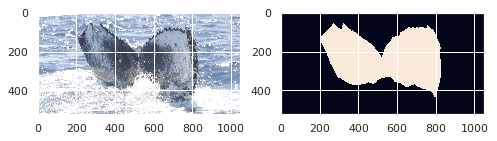

dcab6528f  started!


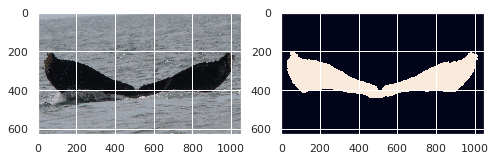

cb75cf8a5  started!


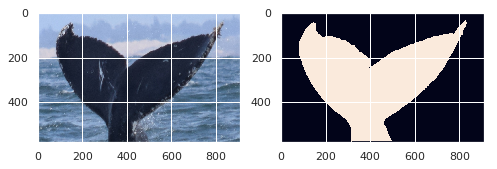

In [63]:
loopShow('/home/ubuntu/whale/data/*.jpg')

In [8]:
anno

{'image_name': '07837c640_1545138055',
 'annotation': [{'尾部下沿中间点': [{'x': 574, 'y': 180.5}],
   '鲸鱼尾巴尖': [{'x': 10, 'y': 19.5}, {'x': 989, 'y': 12.5}],
   '尾部下沿': [{'x': 10.5, 'y': 19.33},
    {'x': 22.5, 'y': 22.33},
    {'x': 32.5, 'y': 23.33},
    {'x': 46.83, 'y': 29.33},
    {'x': 59.83, 'y': 39.33},
    {'x': 66.5, 'y': 47.33},
    {'x': 72.17, 'y': 50.0},
    {'x': 78.5, 'y': 48.33},
    {'x': 86.17, 'y': 48.67},
    {'x': 88.5, 'y': 47.0},
    {'x': 98.83, 'y': 55.0},
    {'x': 108.17, 'y': 57.33},
    {'x': 112.5, 'y': 60.33},
    {'x': 117.83, 'y': 57.33},
    {'x': 125.17, 'y': 60.67},
    {'x': 129.17, 'y': 56.0},
    {'x': 134.5, 'y': 60.33},
    {'x': 137.17, 'y': 50.67},
    {'x': 143.17, 'y': 53.33},
    {'x': 151.5, 'y': 53.67},
    {'x': 160.17, 'y': 61.67},
    {'x': 166.5, 'y': 58.33},
    {'x': 170.5, 'y': 53.33},
    {'x': 182.5, 'y': 58.33},
    {'x': 191.83, 'y': 60.33},
    {'x': 203.83, 'y': 64.0},
    {'x': 225.5, 'y': 59.0},
    {'x': 247.83, 'y': 68.67},
  

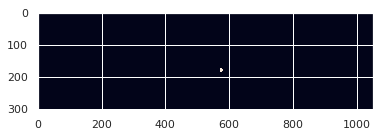

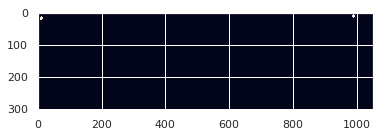

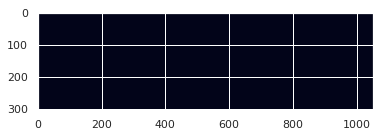

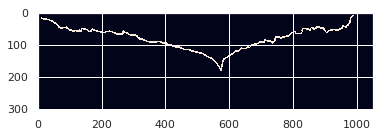

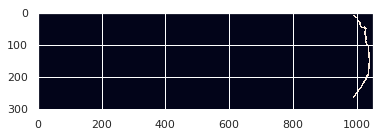

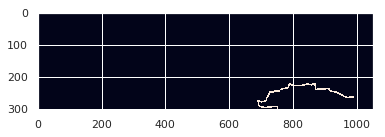

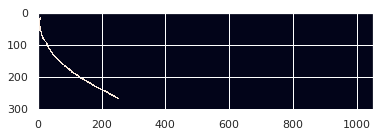

In [65]:
for i in range(heatmap.shape[0]):
    plt.imshow(heatmap[i])
    plt.show()